In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pylab as plt 
import pandas as pd
import numpy as np
import datetime
import random

In [3]:
xl_file = pd.ExcelFile('analisis termico.xlsx')
domo_2=xl_file.parse('domo2',skiprows=6).drop('Unnamed: 6',axis=1).dropna()
#confrontation_victims=xl_file.parse('Casos Válidos')

In [4]:
in_mean_hour_temperature=domo_2[['TIME','TEMPERATURE']].groupby('TIME').mean()
out_mean_hour_temperature=domo_2[['TIME.1','TEMPERATURE.1']].groupby('TIME.1').mean()

<IPython.core.display.Javascript object>


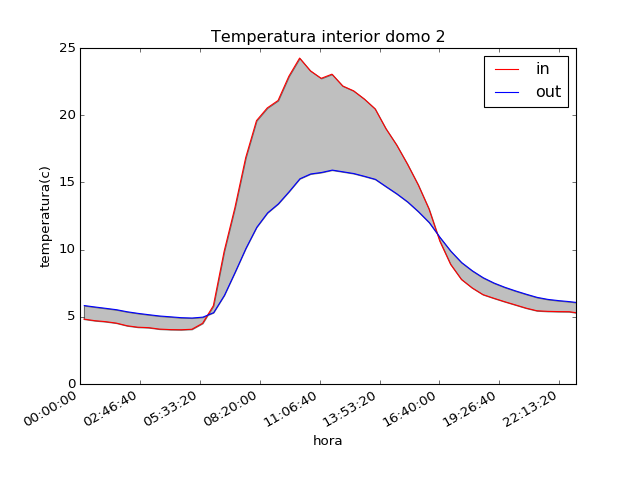

In [8]:
plt.figure()

plt.fill_between(in_mean_hour_temperature.index,out_mean_hour_temperature['TEMPERATURE.1'],in_mean_hour_temperature['TEMPERATURE'], facecolor='gray', alpha=0.5) # Add filled area
plt.plot(in_mean_hour_temperature.index, in_mean_hour_temperature['TEMPERATURE'],c='r',label="in")
plt.plot(out_mean_hour_temperature.index, out_mean_hour_temperature['TEMPERATURE.1'],c='b',label="out")
plt.gcf().autofmt_xdate()
plt.title('Temperatura interior domo 2')
plt.xlabel('hora')
plt.ylabel('temperatura(c)')
plt.xlim([datetime.time(0, 0, 0), datetime.time(23,0,0)])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


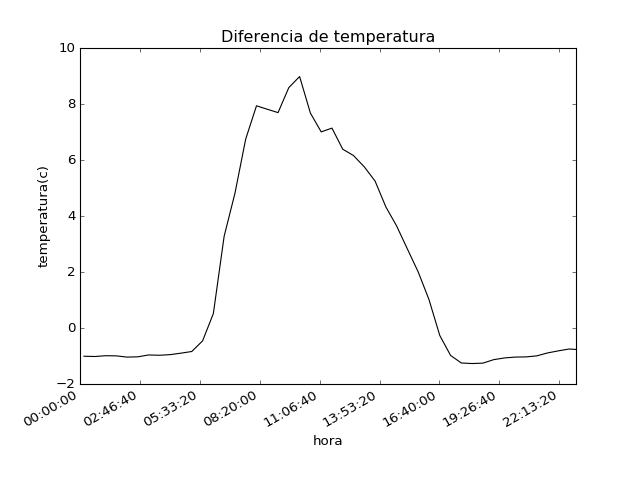

In [20]:
difference=np.array(list(in_mean_hour_temperature['TEMPERATURE']))- np.array(list(out_mean_hour_temperature['TEMPERATURE.1']))
plt.figure()
plt.plot(in_mean_hour_temperature.index,difference,c='black')
plt.gcf().autofmt_xdate()
plt.title('Diferencia de temperatura')
plt.xlabel('hora')
plt.ylabel('temperatura(c)')
plt.xlim([datetime.time(0, 0, 0), datetime.time(23,0,0)])
plt.show()